# Module 1, Lesson 2: Generation of discrete random variables

See slides for information about
* probability mass function
* Cumulative distribution function
* Discrete uniform distribution


## Inversion method for sampling from a general discrete distribution

$$ Pr{X = x_{i}} = p_{i}, i = 1,2,..., $$
Cumulative distribution function (CDF)
$$ F_{i} = Pr{X = x_{i}} = p_{1} + p_{2} + ... + p_{i} $$

Figure 12.1

Sample nucleotide at random using probabilities 0.1, 0.2, 0.3, 0.4 for T,C,A,G respectively. Below is a visualization of how the nuleotides will be sampled.

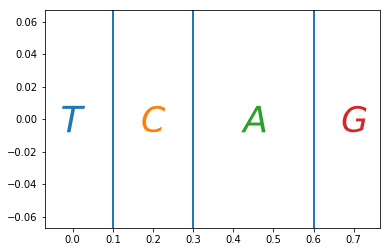

In [166]:
%matplotlib inline
import pylab as py

data = [["T", 0,    0], 
        ["C", 0.2,  0], 
        ["A", 0.45, 0], 
        ["G", 0.7,  0]]

for item in data:
    py.scatter(item[1], item[2], s=700,
               
           
           marker=r"$ {} $".format(item[0]), edgecolors='none' )
    py.axvline(x=0.1)
    py.axvline(x=0.3)
    py.axvline(x=0.6)

py.show()

We will first make a ```nucleotides``` list and a ```nucleotide_probabilities``` list. Then we can generate the CDF list.



In [51]:
import numpy as np
import random
nucleotides = ["T","C","A","G"]
nucleotide_probabilities = [0.1,0.2,0.3,0.4]
cdf = np.zeros(4)
for i in range(len(nucleotide_probabilities)):
  cdf[i] = nucleotide_probabilities[i] + cdf[i -1]
print("cdf:",cdf)
# [0.1,0.3,0.6,1.0]

cdf: [0.1 0.3 0.6 1. ]


Now define a function that samples a random nucleotide

In [57]:

def random_nucleotide(nucleotides,nucleotide_probabilities,cdf):
    u = random.random()
    print("u:",u)
    for i in range(len(cdf)):
      if u < cdf[i]:
        nucleotide = nucleotides[i]
        break     
    return nucleotide
print("nucleotide:",random_nucleotide(nucleotides,nucleotide_probabilities,cdf))


u: 0.3406663370487648
nucleotide: A


### On your own

Write a function to generate a random sequence of DNA of length N for any given nucleotide probabilities


In [27]:
def random_dna(N,nucleotide_probabilities):
    
    return dna

## Poisson distribution

This measures the probability that a certain number of events $x$ (only positive integers) occur given an expected rate of occurence $λ$ (any positive real number).

Random variable $X$ is Poisson distributed with mean $λ$ if
$$ p_{x} = Pr(X = x) = \frac{e^{-λ} λ^x }{x!}, x =0,1, ..., $$

## Guided exercise
Make a function for poisson equation

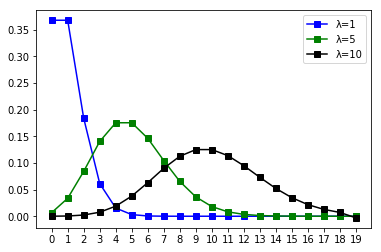

In [82]:
%matplotlib inline
def poisson_n(λ,n):
    x = np.arange(0, n, 1)
    y = np.exp(-λ)*np.power(λ, x)/factorial(x)
    return x,y
# print(poisson_n(1,20))
poisson1_x, poisson1_y = poisson_n(1,20)
poisson5_x, poisson5_y = poisson_n(5,20)
poisson10_x, poisson10_y = poisson_n(10,20)

plt.plot(poisson1_x,poisson1_y,'-bs',label="λ=1")
plt.plot(poisson5_x,poisson5_y,'-gs',label="λ=5")
plt.plot(poisson10_x,poisson10_y,'-ks',label="λ=10")
plt.xticks(range(20))
plt.legend()
plt.show()

Mean = Variance = λ = $E(X) = V(X)$



### Inversion method for generating Poisson variates with rate λ

1. Generate a random number $u$
2. Set $x=0$, $F = p = e^(λ)$
3. If $u < F$, set $X <-- x$, and stop
4. Set $p <-- pλ/(x+1)$,$F <-- F +p$, and $x <-- x + 1$. $F$ is now $F_{x+1}$
5. Go to step 3.

Here $F$ records the CDF

In [164]:
import random
def inversion_poisson(λ):
    u = random.random()
    x = 0
    F = np.exp(-λ)
    while True:
        if u < F:
            X = x
            return X
        else:
            p = F * (λ/(x+1))
            F = F + p 
            x += 1
    



  # cdf = np.zeros(4)
  # cdf[0] =
  #return X

print(inversion_poisson(10))


6


## On your own
Write a function to generate a list of poisson variables of length N for a given λ.
Check the mean to make sure λ = mean = variance